### 1. Loading Libraries

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras


import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

### 2. Preprocessing Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

### 3. Model Building & Training | LeNet

In [3]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1), padding='same'))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='tanh'))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(120, activation='tanh'))
model.add(tf.keras.layers.Dense(84, activation='tanh'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=10, verbose = 1)

model.evaluate(x_test,y_test, verbose = 1)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8887 - loss: 0.3930
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9713 - loss: 0.0954
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9799 - loss: 0.0628
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9857 - loss: 0.0451
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9884 - loss: 0.0359
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9907 - loss: 0.0292
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9927 - loss: 0.0221
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9923 - loss: 0.0237
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9932 - loss: 0.0202
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9947 - loss: 0.0173
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9803 - loss: 0.0617


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,120 (723.13 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 123,414 (482.09 KB)

### 4. Build Model with alternate Output

In [4]:
flatten_output = model.get_layer('dense').output
new_model = keras.Model(inputs=model.inputs, outputs=flatten_output)

new_model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          48,120 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,692 (198.02 KB)

 Trainable params: 50,692 (198.02 KB)

 Non-trainable params: 0 (0.00 B)

### 5. Perform Dimensionality Reduction

In [5]:
logits = new_model.predict(x_test, verbose = 0)


tsne = TSNE(n_components=2, random_state=42, perplexity=30)
logits_2d = tsne.fit_transform(logits)

np.save('logits_2d.npy',logits_2d)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 28, 28, 1))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 28, 28, 1))
  warnings.warn(msg)


### 6. Visualize the Output

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


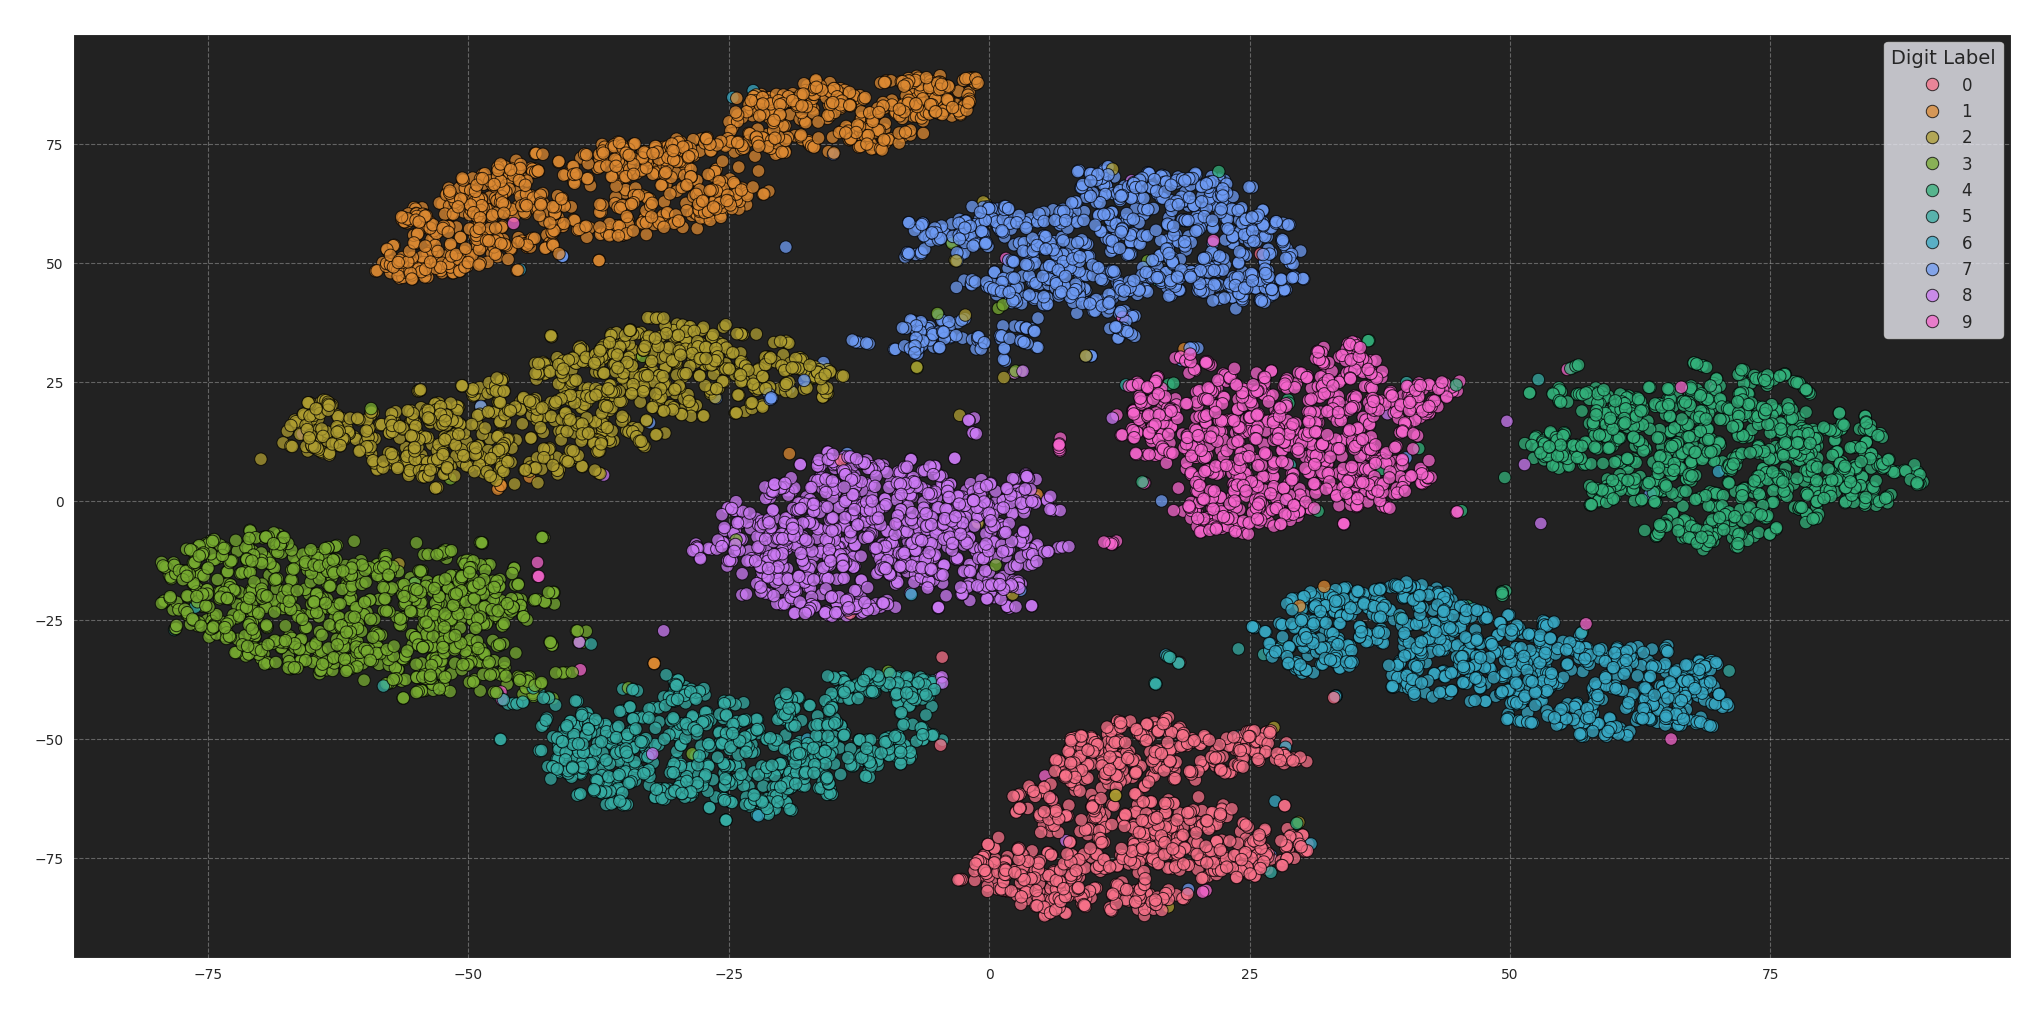

In [6]:
df = pd.DataFrame(logits_2d, columns=["TSNE Component 1", "TSNE Component 2"])
df["Digit Label"] = y_test  # Use same subset

# Set a classy dark theme
sns.set_style("darkgrid")
plt.figure(figsize=(25, 12))

# Use a sophisticated color palette
palette = sns.color_palette("husl", 10)

sns.scatterplot(
    x="TSNE Component 1",
    y="TSNE Component 2",
    hue="Digit Label",
    palette=palette,
    data=df,
    s=80,
    alpha=0.75,
    edgecolor="black"
)

# Improve title & labels with better font style
plt.title("✨ Classy t-SNE Projection of MNIST ✨", fontsize=16, fontweight="bold", color="white")
plt.xlabel("t-SNE Component 1", fontsize=14, fontweight="medium", color="white")
plt.ylabel("t-SNE Component 2", fontsize=14, fontweight="medium", color="white")

# Adjust legend
plt.legend(title="Digit Label", fontsize=12, title_fontsize=14, loc="upper right", frameon=True)

# Set a dark background for better contrast
plt.gca().set_facecolor("#222222")
plt.grid(True, linestyle="--", alpha=0.3)

# Show plot
plt.show()

### 7. Digits in Space

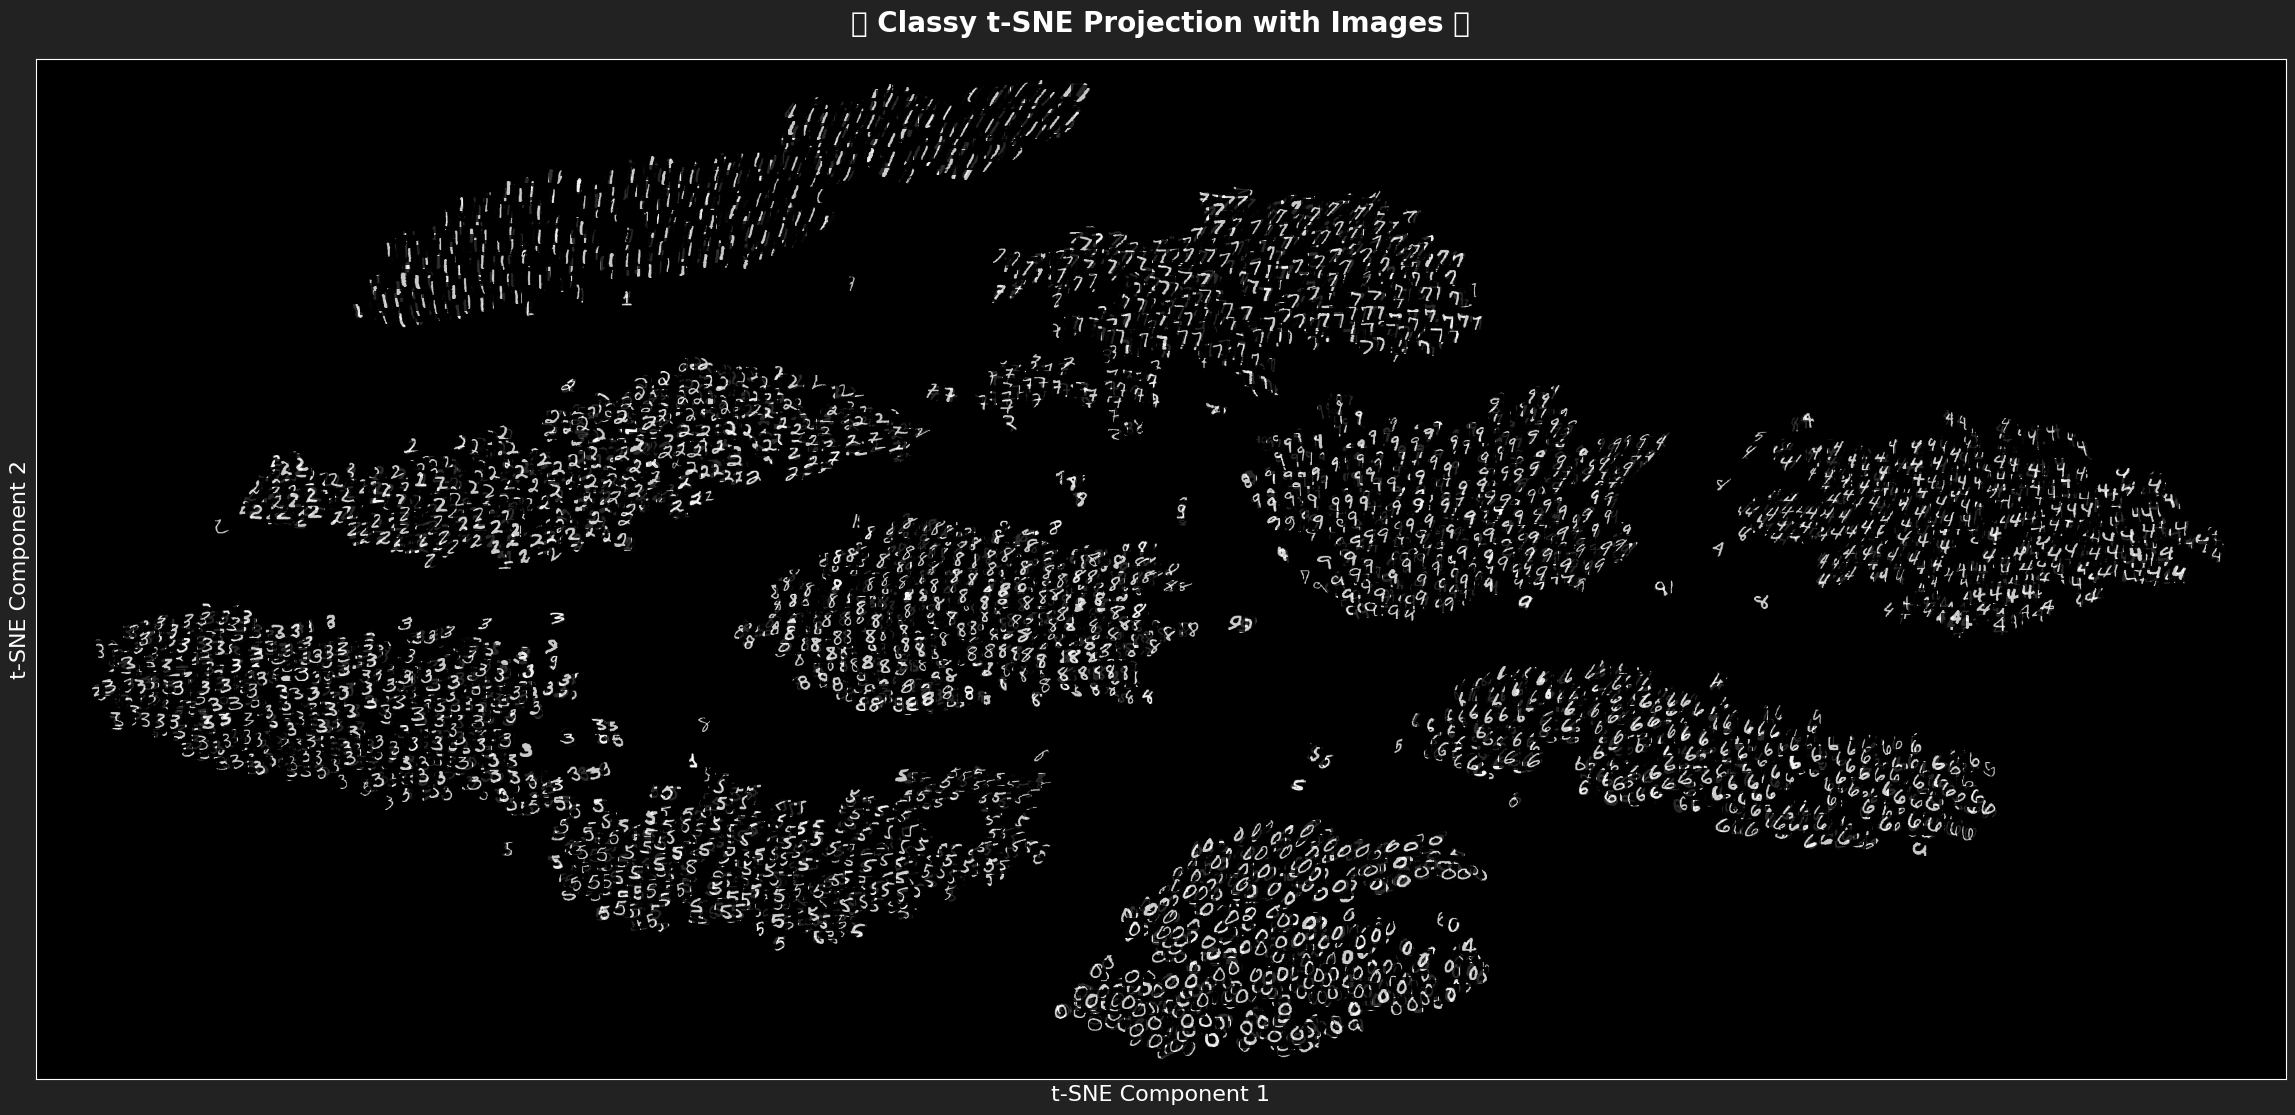

In [10]:
# x_test = x_test.reshape(-1,28,28)


fig, ax = plt.subplots(figsize=(25, 12))
fig.patch.set_facecolor('#222222')  # Set figure background
ax.set_facecolor('#000000')  # Set axis background

# Set title with custom styling
ax.set_title("✨ Classy t-SNE Projection with Images ✨", fontsize=20, fontweight="bold", color="white", pad=20)

def plot_image(x, y, img, ax, zoom=0.5, colormap="viridis"):
    imgbox = OffsetImage(img, zoom=zoom, cmap=colormap, alpha = .8)
    ab = AnnotationBbox(imgbox, (x, y), frameon=False)
    ax.add_artist(ab)

# Loop through each image and plot it at its corresponding t-SNE coordinate
for i in range(len(logits_2d)):
    plot_image(logits_2d[i, 0], logits_2d[i, 1], x_test[i], ax, zoom=0.5, colormap="gray")

# Customize axis appearance
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("t-SNE Component 1", fontsize=16, fontweight="medium", color="white")
ax.set_ylabel("t-SNE Component 2", fontsize=16, fontweight="medium", color="white")

# Add a subtle grid for better readability
ax.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.5)

# Set limits to avoid images going outside the frame
ax.set_xlim(logits_2d[:, 0].min() - 5, logits_2d[:, 0].max() + 5)
ax.set_ylim(logits_2d[:, 1].min() - 5, logits_2d[:, 1].max() + 5)

# Reduce figure margin spacing
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05)

# Show the final visualization
plt.show()

### 8. Final Visualization

<ipython-input-12-bba284900526>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap("tab10", 10)  # 10 distinct colors for 10 digits


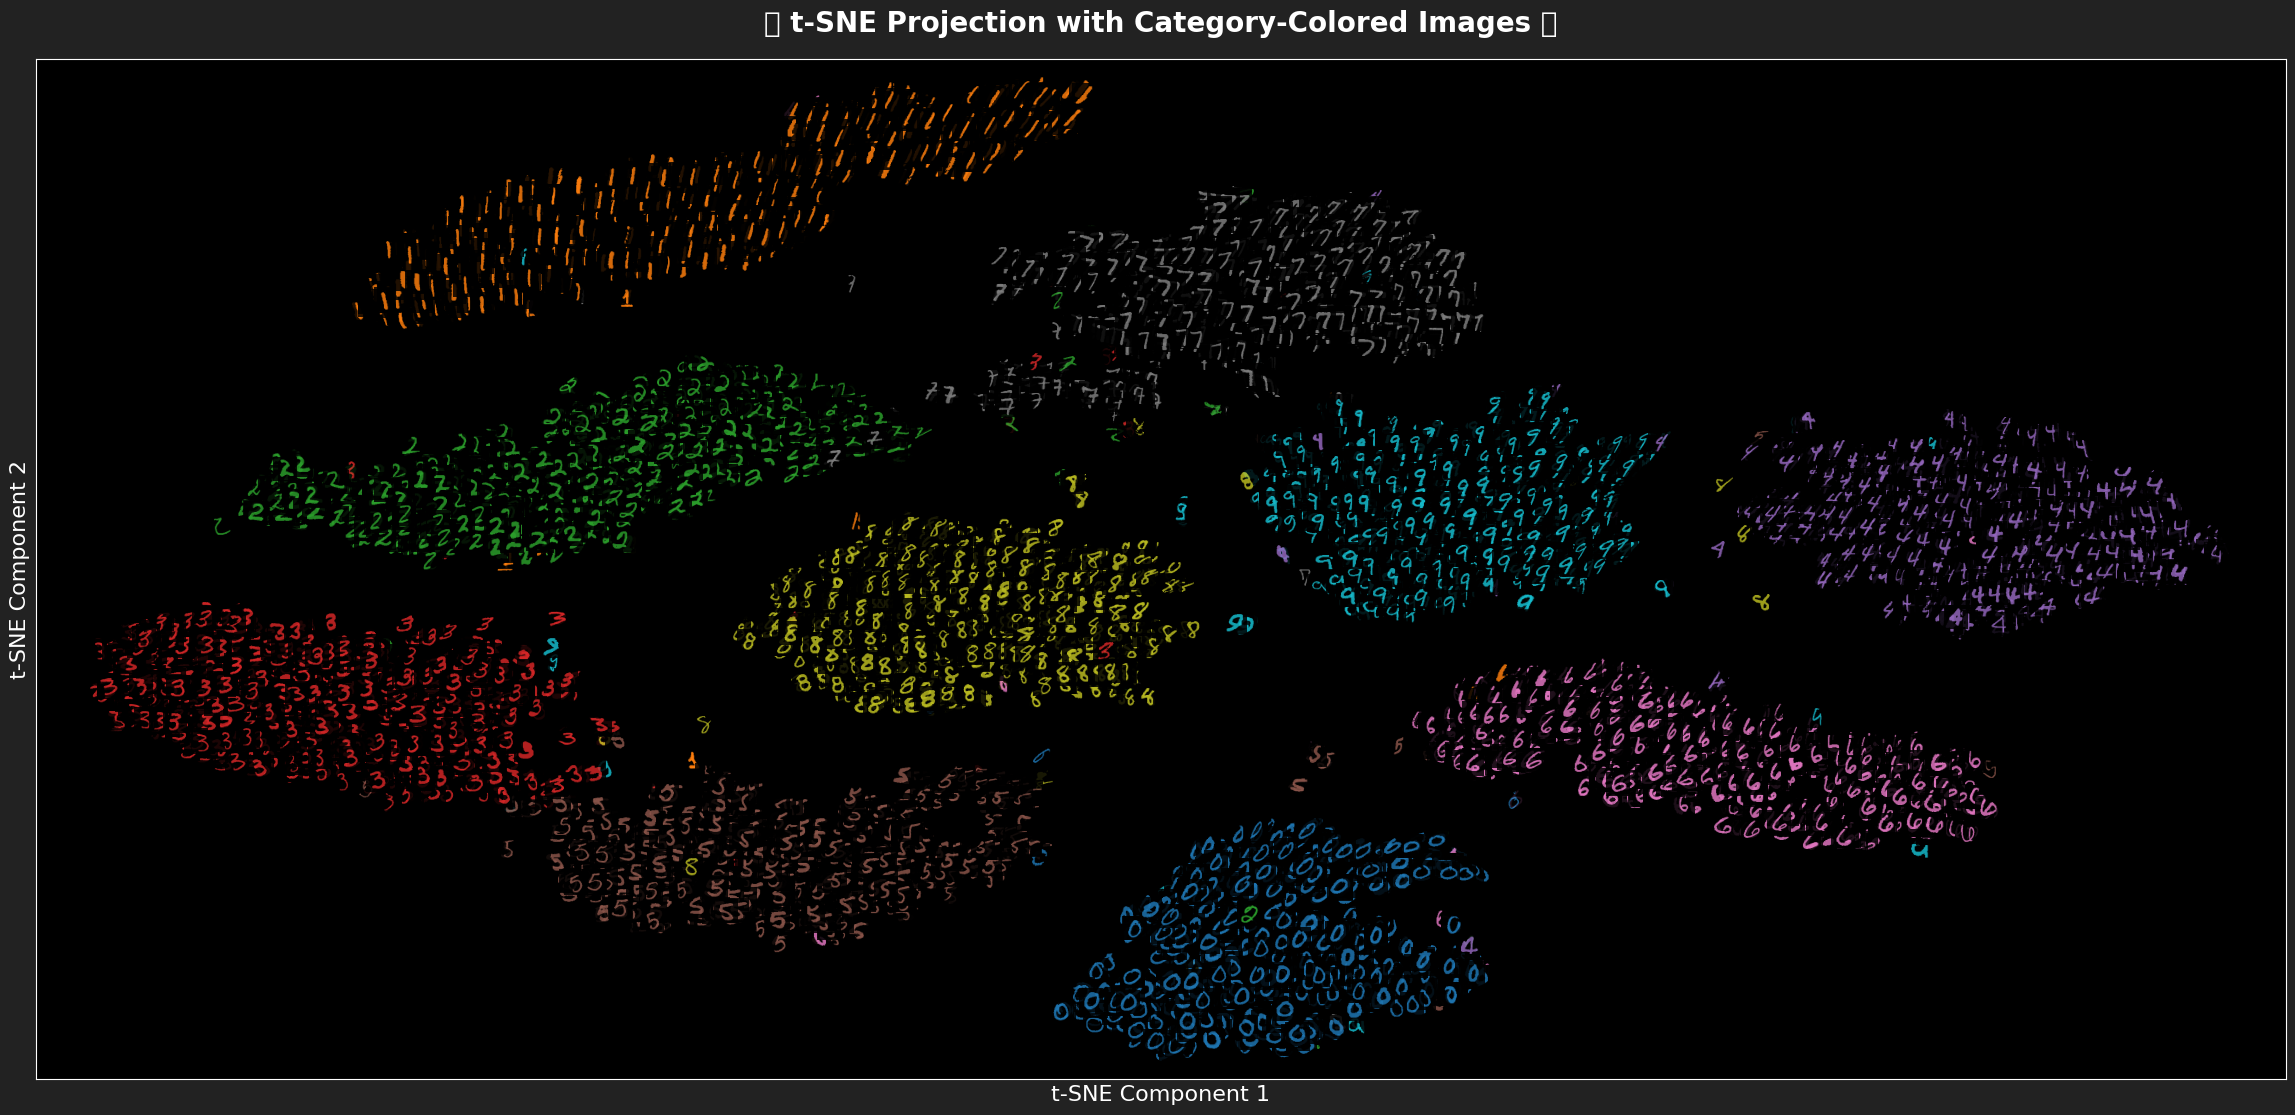

In [12]:
color_map = cm.get_cmap("tab10", 10)  # 10 distinct colors for 10 digits

x_test = x_test.reshape(-1,28,28)

def colorize_image(img, color):
    """
    Adds a tint of the given color to a grayscale image.
    """
    img_colored = np.zeros((img.shape[0], img.shape[1], 4))  # RGBA
    img_colored[:, :, 0] = img * color[0]  # Red
    img_colored[:, :, 1] = img * color[1]  # Green
    img_colored[:, :, 2] = img * color[2]  # Blue
    img_colored[:, :, 3] = 1  # Alpha (transparency)
    return img_colored

# Create the figure with a dark theme
fig, ax = plt.subplots(figsize=(25, 12))
fig.patch.set_facecolor('#222222')  # Set figure background
ax.set_facecolor('#000000')  # Set axis background

# Set title with custom styling
ax.set_title("✨ t-SNE Projection with Category-Colored Images ✨", fontsize=20, fontweight="bold", color="white", pad=20)

# Function to overlay images instead of scatter points
def plot_image(x, y, img, ax, zoom=0.5, color=None):
    """Plots an image at (x, y) using a color-tinted version."""
    if color is not None:
        img = colorize_image(img, color)  # Apply color
    imgbox = OffsetImage(img, zoom=zoom, alpha=0.85)
    ab = AnnotationBbox(imgbox, (x, y), frameon=False)
    ax.add_artist(ab)

# Loop through each image and plot it at its corresponding t-SNE coordinate
for i in range(len(logits_2d)):
    digit_class = y_test[i]  # Get digit label (0-9)
    digit_color = color_map(digit_class)  # Assign color based on label
    plot_image(logits_2d[i, 0], logits_2d[i, 1], x_test[i], ax, zoom=0.6, color=digit_color)

# Customize axis appearance
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("t-SNE Component 1", fontsize=16, fontweight="medium", color="white")
ax.set_ylabel("t-SNE Component 2", fontsize=16, fontweight="medium", color="white")

# Add a subtle grid for better readability
ax.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.5)

# Set limits to avoid images going outside the frame
ax.set_xlim(logits_2d[:, 0].min() - 5, logits_2d[:, 0].max() + 5)
ax.set_ylim(logits_2d[:, 1].min() - 5, logits_2d[:, 1].max() + 5)

# Reduce figure margin spacing
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05)

# Show the final visualization
plt.show()

### 9. Generating and Saving Logits

In [13]:
np.save('2d_logits_test.npy',logits_2d)

In [14]:
logits = new_model.predict(x_train, verbose = 0)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
logits_2d = tsne.fit_transform(logits)

np.save('2d_logits_train.npy',logits_2d)

In [ ]:
x_combined = np.concatenate((x_train, x_test), axis=0)

logits = new_model.predict(x_combined, verbose = 0)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
logits_2d = tsne.fit_transform(logits)

np.save('2d_logits_combined.npy',logits_2d)